# Import

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


import random
import matplotlib.pyplot as plt 

In [2]:
import os
print(os.getcwd())
print(os.listdir('imageClassification'))



/Users/rsn/ML:DL
['labels_test.csv', 'labels.csv', 'input.csv', 'input_test.csv']


# Adding Dataset

In [3]:
X_train = np.loadtxt('imageClassification/input.csv', delimiter=',')
Y_train = np.loadtxt('imageClassification/labels.csv', delimiter=',')

X_test = np.loadtxt('imageClassification/input_test.csv', delimiter=',')
Y_test = np.loadtxt('imageClassification/labels_test.csv', delimiter=',')

# Reshaping/shaping

In [4]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [5]:
print("shape of X_train", X_train.shape)
print("shape of Y_train", Y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of Y_train", Y_test.shape)


shape of X_train (2000, 100, 100, 3)
shape of Y_train (2000, 1)
shape of X_test (400, 100, 100, 3)
shape of Y_train (400, 1)


In [6]:
# X_train[1,:]
# <!--it shows values ranging upto 255 which is RGB values  -->


In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
# here we divide it with 255 to rescale our value between 0 to 1

<function matplotlib.pyplot.show(close=None, block=None)>

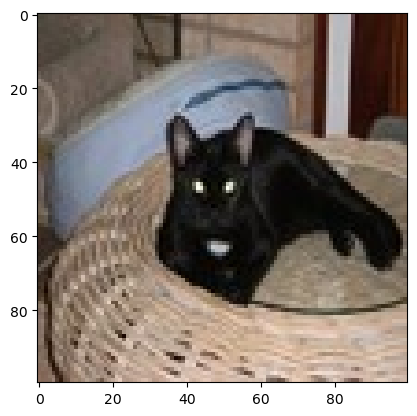

<Figure size 1500x200 with 0 Axes>

In [8]:
# by using matplotlib we display the image
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :],cmap = "gray")
plt.figure(figsize = (15,2))
plt.show

# Model....


In [9]:
model  = Sequential()
# 1. first layer 
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape =(100,100,3)))
model.add(MaxPooling2D(2,2))

# 2. sec layer
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))

# 3.
model.add(Flatten())
# 4.
model.add(Dense(64,activation = 'relu'))
# 5.
model.add(Dense(1, activation = "sigmoid"))

/Users/rsn/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

# Model Fit

In [ ]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4975 - loss: 0.7290
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6191 - loss: 0.6602
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6787 - loss: 0.6033
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7351 - loss: 0.5374
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7584 - loss: 0.4771
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8023 - loss: 0.4206
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8772 - loss: 0.3016
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9236 - loss: 0.2429
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9476 - loss: 0.1574
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9627 - loss: 0.1110
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9861 - loss: 0.0695
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step

# Test accuracy

In [ ]:
model.evaluate(X_test, Y_test)

# Prediction

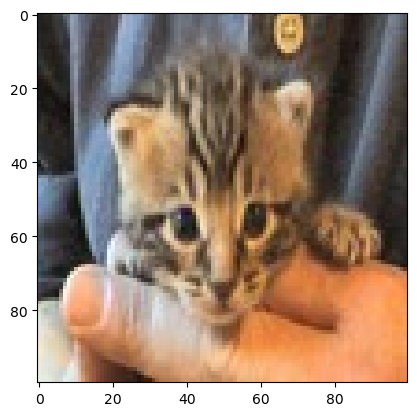

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
This is a Cat


In [19]:
xyz = random.randint(0,len(Y_test))
plt.imshow(X_test[xyz, :])
plt.show()

y_pred = model.predict(X_test[xyz, : ].reshape(1,100,100,3))

y_pred = y_pred > 0.5
if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
    
print("This is a",pred)   
    